In [1]:
import jupyterthemes as jt
from jupyterthemes import jtplot
!jt -l
!jt -t onedork -ofs 10 -dfs 9 -nfs 9 -tfs 11
jtplot.style(theme = 'onedork', fscale = 1.4, context = 'notebook', ticks = True, grid = False)

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import string
import re
import pickle
import zipfile
from string import punctuation
from pymorphy2 import MorphAnalyzer
from sklearn import metrics
from num2words import num2words
from matplotlib import pylab as plt
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#load data
test_data = pd.read_csv('test_data.csv')
target = test_data['is_bad']

#Concat all text
test_data['all_text'] = test_data['title'] + ' ' + test_data['description'] + \
                        ' '  + test_data['region'] + ' ' + test_data['city']

#Preprocess function
def text_preprocess(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = re.sub('\t', ' ', text)
    text = re.sub('х\d', ' ', text)
    text = re.sub('×', ' ', text)
    text = re.sub('б/у', ' бывший употребление ', text)
    text = re.sub('пн-пт', ' будни ', text)
    text = re.sub('сб-вс', ' выходные ', text)
    text = re.sub('\sм.кв.\s', ' метр квадратный ', text)
    text = re.sub('\d+:\d+ до \d+:\d+', ' время работы ', text)
    text = re.sub("[!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+", ' ', text)
    text = re.sub('\sэт\s', ' этаж ', text)
    text = re.sub('\sрф\s', ' россия ', text)
    text = re.sub('\sтел\s', ' телефон ', text)
    text = re.sub('\sсм\s', ' сантиметр ', text)
    text = re.sub('\sга\s', ' гектар ', text)
    text = re.sub('\sкв\s', ' квадратный ', text)
    text = re.sub('\sм\s', ' метр ', text)
    text = re.sub('\sкм\s', ' километр ', text)
    text = re.sub('\sга\s', ' гектар ', text)
    text = re.sub('\sул\s', ' улица ', text)
    text = re.sub('\sруб\s', ' рубль ', text)
    text = re.sub('\sтц\s', ' торговый центр ', text)
    text = re.sub('\sтк\s', ' торговый комплекс ', text)
    text = re.sub('₽', ' рубль ', text)
    text = re.sub('\sшт\s', ' штука ', text)
    text = re.sub('\sбу\s', ' бывший употребление ', text)
    text = re.sub('\sпн\s', ' понедельник ', text)
    text = re.sub('\sвт\s', ' вторник ', text)
    text = re.sub('\sср\s', ' среда ', text)
    text = re.sub('\sчт\s', ' четверг ', text)
    text = re.sub('\sпт\s', ' пятница ', text)
    text = re.sub('\sсб\s', ' суббота ', text)
    text = re.sub('\sвскр\s', ' воскресенье ', text)
    text = re.sub('\sвс\s', ' воскресенье ', text)
    text = re.sub('\sчел\s', ' человек ', text)
    text = re.sub('\sм2\s', ' метр квадратный ', text)
    text = re.sub('\sм3\s', ' метр кубический ', text)
    text = re.sub('\sмм\s', ' миллиметр ', text)
    text = re.sub('\sд\s', ' дом ', text)
    text = re.sub('\sстр\s', ' строение ', text)
    text = re.sub('\sсот\s+8', ' телефон восемь', text)
    text = re.sub('\w²', ' квадратный ', text)
    text = re.sub('\w³', ' кубический ', text)
    text = re.sub('\wˉ¹', ' ', text)
    text = re.sub('[⁰❶❷❸❹❺❻❼❽❾❿]', ' ', text)
    text = re.sub('[①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮⑯⑰⑱⑲⑳]', ' ', text)
    text = re.sub('[➊➋➌➍➎➏➐➑➒]', ' ', text)
    text = re.sub('[ˉ⁴ˉ³ˉ²ˉ¹⁰¹²³⁴⁵⁶⁷⁸⁹]', ' ', text)
    return text

#Text_preprocess
test_data['all_text'] = test_data['all_text'].apply(lambda x: text_preprocess(x))

#del symbols
def del_sybmols(text):
    text = ''.join([' ' if not i.isalnum() else i for i in text])
    return text

#del symbols function
test_data['all_text'] = test_data['all_text'].apply(lambda x: del_sybmols(x))

In [4]:
#Lemmatizer
morph = MorphAnalyzer()
  
#Stop words
stop_words = stopwords.words('russian')
more_stop_words = ['которых', 'которые', 'твой', 'которой', 'которого', 'сих', 'ком', 'свой', 'твоя',
                   'этими', 'слишком', 'нами', 'всему', 'будь', 'саму', 'чаще', 'ваше', 'сами', 'наш',
                   'затем', 'еще', 'самих', 'наши', 'ту', 'каждое', 'мочь', 'весь', 'этим', 'наша',
                   'своих', 'оба', 'который', 'зато', 'те', 'этих', 'вся', 'ваш', 'такая', 'теми',
                   'ею', 'которая', 'нередко', 'каждая', 'также', 'чему', 'собой', 'самими', 'нем',
                   'вами', 'ими', 'откуда', 'такие', 'тому', 'та', 'очень', 'сама', 'нему', 'алло',
                   'оно', 'этому', 'кому', 'тобой', 'таки', 'твоё', 'каждые', 'твои', 'мой', 'нею',
                   'самим', 'ваши', 'ваша', 'кем', 'мои', 'однако', 'сразу', 'свое', 'ними', 'всё',
                   'неё', 'тех', 'хотя', 'всем', 'тобою', 'тебе', 'одной', 'другие', 'эта', 'само',
                   'эта', 'буду', 'самой', 'моё', 'своей', 'такое', 'всею', 'будут', 'своего', 'кого',
                   'свои', 'мог', 'нам', 'особенно', 'её', 'самому', 'наше', 'кроме', 'вообще', 'вон',
                   'мною', 'никто', 'это']
for i in more_stop_words:
    stop_words.append(i)

In [5]:
#Lemmatize function
def lemmatize(token_sentence): 
    tokens = []
    for token in token_sentence:
            if token not in stop_words \
            and token != ' ' \
            and token.strip() not in punctuation \
            and len(token) > 1:
                token = token.strip()
                token = morph.normal_forms(token)[0]
                tokens.append(token)
    if len(tokens) > 1:
        return ' '.join(tokens)
    return None

#Tokens
test_data['all_tokens'] = test_data['all_text'].apply(nltk.word_tokenize)

#Lemmatize
test_data['clear_text'] = test_data['all_tokens'].apply(lambda x: lemmatize(x))

#num to word
def NumToWord(text):
    text = ''.join([' ' + num2words(i, lang = 'ru') + ' ' if i.isdigit() else i for i in text])
    return text

#text with num2word
test_data['clear_text'] = test_data['clear_text'].apply(lambda x: NumToWord(x))

In [6]:
#TFIDF vectorizer
with zipfile.ZipFile('vectorizer.zip', 'r') as vectorizer_zip:
    vectorizer_zip.extractall()
with open('vectorizer.pkl', 'rb') as vectorizer_pickle:
    vectorizer = pickle.load(vectorizer_pickle)
    
#tfidf transform
test = vectorizer.transform(test_data['clear_text'])

#Logistic regression
with zipfile.ZipFile('logreg.zip', 'r') as logreg_zip:
    logreg_zip.extractall()
with open('logreg.pkl', 'rb') as logreg_pickle:
    logreg = pickle.load(logreg_pickle)

ROC AUC on test data: 0.9328426171507874


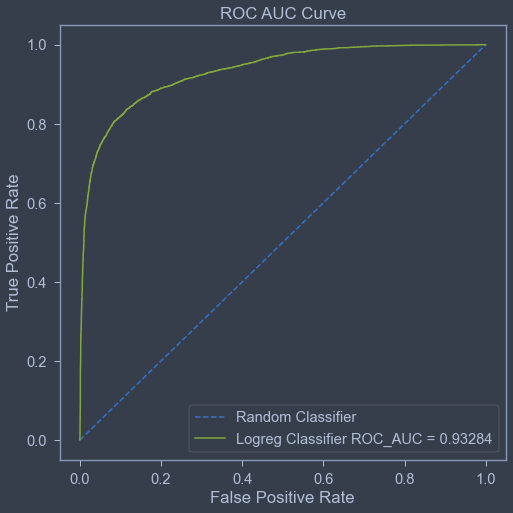

In [7]:
#Predict
prediction = logreg.predict_proba(test)[:, 1]
print('ROC AUC on test data:', metrics.roc_auc_score(target, prediction))

#Plot ROC_AUC Curve
plt.figure(figsize = (8, 8))
fpr, tpr, _ = metrics.roc_curve(target, prediction)
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random Classifier')
plt.plot(fpr, tpr, label = 'Logreg Classifier ROC_AUC = ' + \
                            str(round(metrics.roc_auc_score(target,prediction), 5)))
plt.title('ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()